In [1]:
pip install handcalcs

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import handcalcs.render

from pint import UnitRegistry
u=UnitRegistry(auto_reduce_dimensions=True)

import math

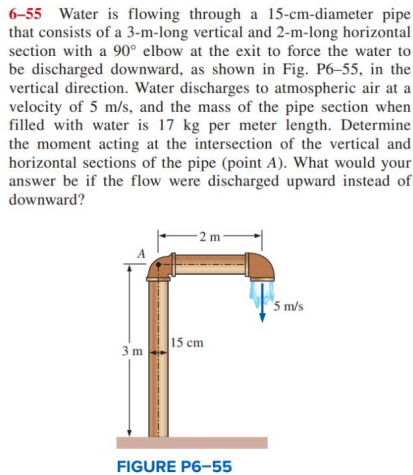

## Solution:
Given a water pipe with a downward water exit. The moment acting at the intersection of the pipe at point A is to be determined, and if that moment would change if the flow were upwards.

## Assumptions:
The flow is steady and incompressible.

The gage pressure is zero at the outlet because the water is discharged into the atmosphere

## Analysis:


In [49]:
%%render param
D_p = 15*u.cm #diameter of pipe
h = 3*u.cm #vertical length of pipe
l = 2*u.m #horizontal length of pipe
r_1 = l/2
V_w = 5*(u.m/u.s) #water discharge velocity
m = 17*(u.kg/u.m) #mass of the pipe section when filled with water
g = 9.81*(u.m/u.s**2)
rho = 1000*(u.kg/u.m**3)
pi = math.pi

<IPython.core.display.Latex object>

The mass flow rate equation is $\dot{m} = \rho A_{c}V$

In [37]:
%%render long
A = (pi*(D_p**2))/4
m_flow = rho*A*V_w
W = m*g*l

<IPython.core.display.Latex object>

We can use point A to change our control volume to around the horizontal section.

Apply the angular momentum equation from the book 6-47 $\Sigma \vec{M} = \Sigma_{out} r\dot{m}V - \Sigma_{in}r\dot{m}V$

The only momentum flow will come from the outlet stream, which makes the angular momentum equation about A become $M_{A} - r_{1}W = -r_{2}\dot{m}V_{2}$, when isolating $M_{A}$, $M_{A} = r_{1} - r_{2}\dot{m}V_{2}$

Find the moment downwards
\begin{equation*}
M_a = r_1W - r_2\dot{m}V_2 
\end{equation*}

In [47]:
%%render long
M_a = ((r_1)*W) - (l*m_flow*V_w)

<IPython.core.display.Latex object>

In [40]:
print(M_a.to('N*m'))

-550.0329338221295 meter * newton


Find the moment upwards
\begin{equation*}
M_a = r_1W + r_2\dot{m}V_2
\end{equation*}

In [42]:
%%render
M_A = (r_1*W) + (l*m_flow*V_w)

<IPython.core.display.Latex object>

In [44]:
print(M_A.to('N*m'))

1217.1129338221294 meter * newton


## Discussion:
By using the angular momentum equation, the moment around point A from a downward outlet is - 550 N-m, and for an upward outlet the moment around A is 1217.1 N-m